# **Task 3: To Explore Unsupervised Machine Learning**
#####From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
 

###### **Name: kuldip kumar sah**
####  Asansol Engineering College
#### Applied Electronics & Instrumentation Engineering

### **Importing all required libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Finding the optimum number of clusters for k-means classification

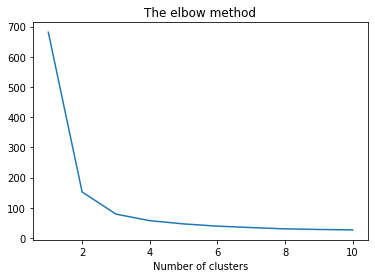

In [2]:
x = datasets.load_iris().data
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.show()

###### from the above graph we find that the optimum number of clusters for k-means classification is **3**

### creating dataframe using dataset "iris"

In [3]:
iris=datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris_df = pd.DataFrame({'sepal length (cm)': iris.data[:,0], 'sepal width (cm)': iris.data[:,1], 'cluster': iris.target})

In [5]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),cluster
count,150.000000,150.000000,150.000000
mean,5.843333,3.057333,1.000000
std,0.828066,0.435866,0.819232
min,4.300000,2.000000,0.000000
25%,5.100000,2.800000,0.000000
50%,5.800000,3.000000,1.000000
75%,6.400000,3.300000,2.000000
max,7.900000,4.400000,2.000000


### finding the centroids of cluster

In [7]:
centroids={}
for i in range(3):
  result_list=[]
  result_list.append(iris_df.loc[iris_df['cluster']==i]['sepal length (cm)'].mean())
  result_list.append(iris_df.loc[iris_df['cluster']==i]['sepal width (cm)'].mean())
  centroids[i]=result_list

In [8]:
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

#### ploting our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

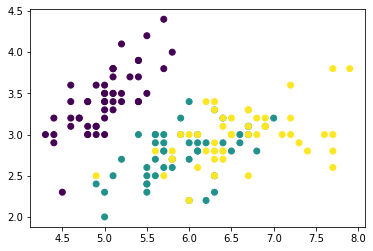

In [9]:
#plotting datapoint
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'], c=iris.target)
plt.show()

##### plotting centroids on 2D graph

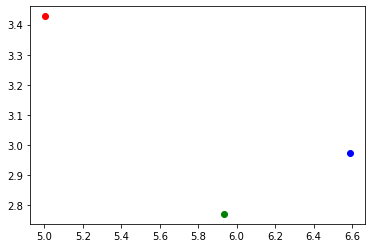

In [10]:
colmap={0: 'r', 1: 'g', 2:'b'}
for i in centroids.keys():
  plt.scatter(centroids[i][0],centroids[i][1],color=colmap[i])
plt.show()

#### plotting data point with there centroid on 2D graph

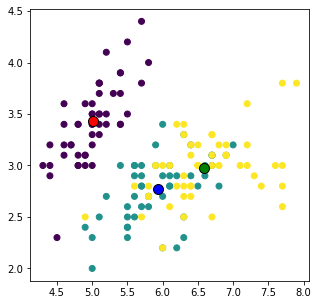

In [11]:
fig=plt.figure(figsize=(5,5))
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'],c=iris.target)
col=[0,1]
colmap={0: 'r', 1: 'b', 2:'g'}
for i in range(3):
  plt.scatter(centroids[i][0],centroids[i][1],color=colmap[i],edgecolors='k', s=100) 
plt.show()

### creating new features ie the distance of each data points from each and every centroieds

In [12]:
def distance(df,centroids):
  for i in range(3):
    df['distance_from{}'.format(i)] =(np.sqrt((df['sepal length (cm)']-centroids[i][0]) **2 
                                              + (df['sepal width (cm)']-centroids[i][1])**2))
  return df

In [13]:
df=distance(iris_df,centroids)

In [14]:
df.head()

,sepal length (cm),sepal width (cm),cluster,distance_from0,distance_from1,distance_from2
0,5.1,3.5,0,0.118406,1.109863,1.578233
1,4.9,3.0,0,0.440931,1.061224,1.688200
2,4.7,3.2,0,0.381602,1.308662,1.901478
3,4.6,3.1,0,0.521939,1.376153,1.991989
4,5.0,3.6,0,0.172105,1.250998,1.706933


### creating new feature which denotes the nearest centroied from that data point

In [15]:
centroid_distance_cols=['distance_from{}'.format(i) for i in range(3)]
df['closest_centroid']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
df['closest_centroid']=df['closest_centroid'].map(lambda x: int(x.lstrip('distance_from')))
df['color']=df['closest_centroid'].map(lambda x: colmap[x])

In [16]:
df.head()

,sepal length (cm),sepal width (cm),cluster,distance_from0,distance_from1,distance_from2,closest_centroid,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,r
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,r
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,r
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,r
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,r


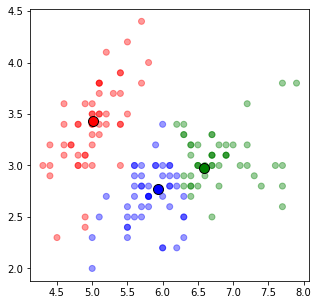

In [17]:
fig=plt.figure(figsize=(5,5))
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'],c=df['color'],alpha=0.4)
for i in range(3):
  plt.scatter(*centroids[i],color=colmap[i],s=100,edgecolors='k')
plt.show()

# **Thank you**